In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict
import json

In [20]:
sns.set_theme(style="ticks")

## Tag analysis

In [3]:
df = pd.read_json(r"danbooru2021\tags000000000000.json", orient="records", lines=True)

In [4]:
df

,updated_at,is_locked,name,category,created_at,post_count,id
0,2019-09-02 11:28:03.321000+00:00,False,midori,0,2013-02-28 17:07:15.609000+00:00,0,9
1,2019-09-01 22:29:49.259000+00:00,False,yukari,0,2013-02-28 19:21:47.082000+00:00,0,31
2,2020-08-14 12:06:59.236000+00:00,False,os,0,2013-02-28 21:18:48.041000+00:00,0,36
3,2019-09-02 16:09:04.735000+00:00,False,manga,0,2013-02-28 01:39:36.557000+00:00,0,45
4,2019-09-02 04:14:49.391000+00:00,False,sakuya,0,2013-02-28 20:09:51.819000+00:00,0,71
...,...,...,...,...,...,...,...
953654,2019-09-01 17:57:36.517000+00:00,False,commissioner_upload,5,2018-10-15 23:51:41.711000+00:00,1788,1496610
953655,2019-08-31 02:27:39.116000+00:00,False,colorized,5,2017-12-24 19:43:16.781000+00:00,7932,514234
953656,2019-08-28 11:37:40.821000+00:00,False,game_cg,5,2013-02-28 17:02:51.989000+00:00,43772,8066
953657,2019-09-02 13:50:13.715000+00:00,False,reward_available,5,2017-12-25 11:50:42.823000+00:00,6398,1452451


Now that's a lot of tags! Almost a million. However, just by looking at the head, it is apparent that many of them have 0 posts associated with them, and are pretty much useless. Let's look at some of them.

In [59]:
df[df['post_count'] == 0].sample(10)

,updated_at,is_locked,name,category,created_at,post_count,id
770032,2019-08-30 06:02:20.464000+00:00,False,matsuri_(rocket_girls),4,2013-02-20 00:36:40.432000+00:00,0,643992
359319,2021-08-11 20:52:05.824000+00:00,False,lingpa,0,2021-08-11 20:52:05.824000+00:00,0,1683583
766344,2018-09-20 07:40:58.752000+00:00,False,shiryuu_rou,4,2017-08-08 16:56:01.884000+00:00,0,545103
351205,2021-01-27 23:32:34.061000+00:00,False,hair_behind,0,2021-01-27 23:32:34.061000+00:00,0,1626170
294835,2016-05-04 02:22:30.625000+00:00,False,holdiong_pipe,0,2016-05-03 17:17:30.565000+00:00,0,1365253
27618,2015-05-21 11:33:58.304000+00:00,False,metalic_arm,0,2015-05-21 11:33:58.304000+00:00,0,510803
776137,2021-11-06 03:36:27.889000+00:00,False,cgaracter:kanzaki_akime,4,2014-10-27 14:36:11.637000+00:00,0,1294330
771945,2019-07-05 14:46:52.453000+00:00,False,lin_beifong,4,2013-02-23 17:41:13.324000+00:00,0,702221
64450,2015-09-08 23:13:09.791000+00:00,False,luca_angellonidhsron_spple,0,2015-09-08 23:13:09.791000+00:00,0,610662
725553,2016-05-06 04:50:31.728000+00:00,False,kujibiki_tokushou:musou_harem-ken,3,2016-05-06 04:50:31.728000+00:00,0,1365627


These seem pretty random and oddly specific, most likely because they're deprecated. Let's count how many there are.

In [62]:
print("Number of tags with 0 posts:", df[df['post_count'] == 0].shape[0])

Number of tags with 0 posts: 454799


Half of the tags here don't even have any posts. Let's investigate the distribution of post counts a bit closer

In [18]:
print(f"Mean: {df['post_count'].mean()}")
print(f"Median: {df['post_count'].median()}")
print(f"Min: {df['post_count'].min()}")
print(f"Max: {df['post_count'].max()}")

Mean: 171.0717961032193
Median: 1.0
Min: 0
Max: 3569919


<AxesSubplot: xlabel='post_count', ylabel='Density'>

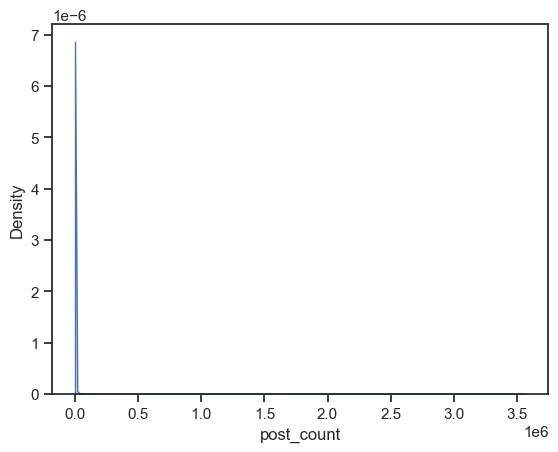

In [30]:
sns.kdeplot(data=df['post_count'], fill=True)

Uhh, let's zoom in on the low occurence tags a little.

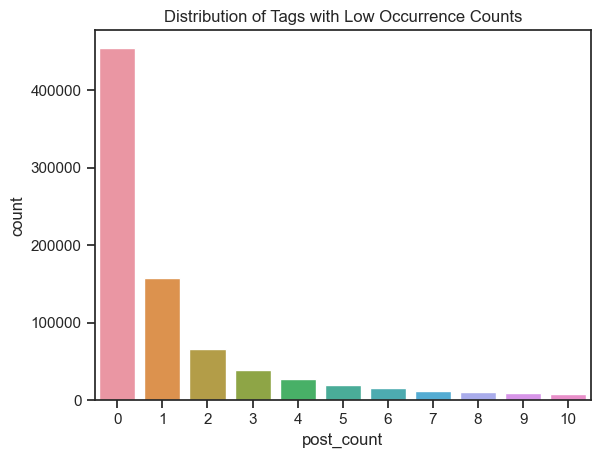

In [48]:
sns.countplot(data=df[df['post_count'] <= 10], x='post_count')\
   .set(title='Distribution of Tags with Low Occurrence Counts')
plt.show()

Since these tags come up so rarely in the data that Waifu Diffusion models are trained on, possibly due to being typos or deprecation, I think it's pretty safe to say that they would have no impact on image generation. Therefore, these low occurance tags can be safely ignored.

Let's now look at the other end of the spectrum, the most popular tags.

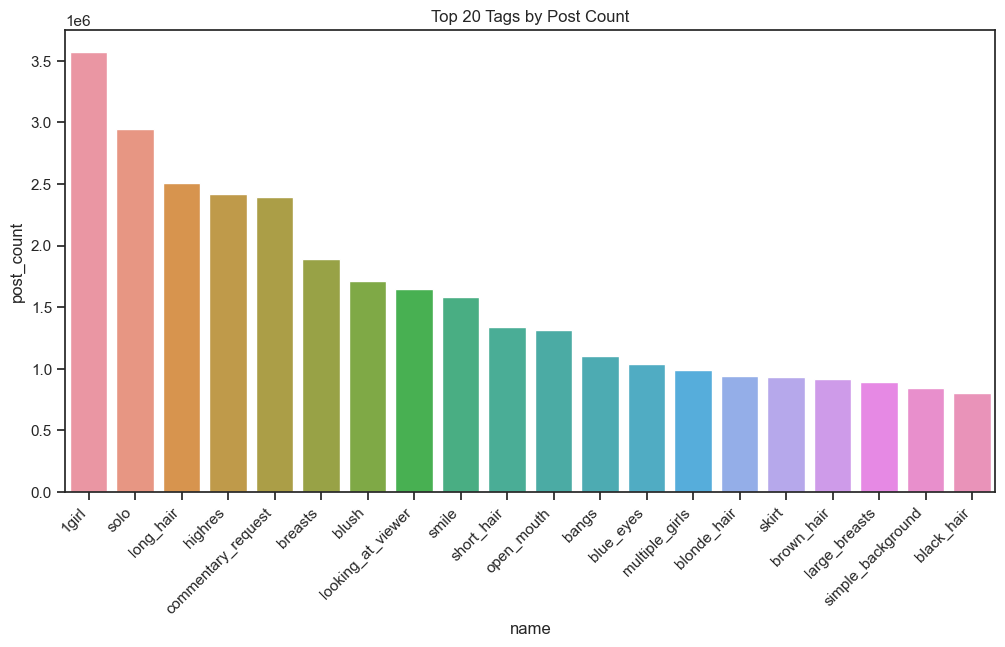

In [58]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x="name",
    y="post_count",
    data=df.sort_values("post_count", ascending=False).head(20),
).set(title="Top 20 Tags by Post Count")
plt.xticks(rotation=45, ha="right")
plt.show()

Of course, 1girl is the usual suspect here with a whopping 3.5 million appearances among the 5 million images, followed by solo, and long_hair. Says a lot about weebs.

Let's take a quick look at the categories now

In [63]:
lookup = {0: "general", 1: "artist", 3: "copyright", 4: "characters", 5: "meta"} # what happened to 2??
df["category"] = df["category"].map(lookup)

In [66]:
df.category.value_counts()

category
general       423670
artist        296851
characters    193540
copyright      38957
meta             641
Name: count, dtype: int64

Mostly general tags as expected, but also a suprising number of artist tags.

Let's now prune away the low occurence tags that would likely have little effect. A similar [project](https://huggingface.co/spaces/SmilingWolf/wd-v1-4-tags) used 600 posts as a cutoff, meaning that tags with less than 600 posts would not be considered. I will go with 500 posts just to include a little more detail. Let's also remove the metadata tags, which are not relevant to the data, as explained in the blog

In [78]:
df = df[df["post_count"] >= 500]
df = df[df['category'] != 'meta']
df.sort_values('post_count', ascending=False, inplace=True)
df

,updated_at,is_locked,name,category,created_at,post_count,id
423668,2019-12-27 00:19:43.276000+00:00,False,1girl,general,2013-02-28 03:39:31.882000+00:00,3569919,470575
404627,2019-12-27 00:20:15.092000+00:00,False,solo,general,2013-02-28 16:42:53.574000+00:00,2946330,212816
418361,2019-08-27 00:40:54.525000+00:00,False,long_hair,general,2013-02-28 05:04:36.440000+00:00,2506393,13197
423348,2019-08-27 20:54:38.246000+00:00,False,breasts,general,2013-02-28 04:44:05.108000+00:00,1894136,8601
421755,2019-12-27 00:19:45.849000+00:00,False,blush,general,2013-02-28 16:34:19.520000+00:00,1715415,3389
...,...,...,...,...,...,...,...
952744,2019-09-02 08:13:50.845000+00:00,False,sazaki_kaoruko,characters,2014-10-02 19:28:43.325000+00:00,500,1291870
759383,2019-09-01 20:39:30.597000+00:00,False,gundam_g_no_reconguista,copyright,2014-10-11 22:48:20.184000+00:00,500,1292817
759382,2019-09-02 08:53:18.934000+00:00,False,sakura_trick,copyright,2013-02-28 01:13:26.956000+00:00,500,723747
720228,2019-09-02 13:00:11.107000+00:00,False,mossi,artist,2014-03-12 20:38:27.433000+00:00,500,1267737


Now these tags should be a lot more relevant. No more overly niche and deprecated tags that won't help with prompting. Even now, the tags at the bottom still seem pretty niche, so this should still be plenty of detail.

Let's perform some analysis on this reduced subset again.

<AxesSubplot: xlabel='post_count', ylabel='Count'>

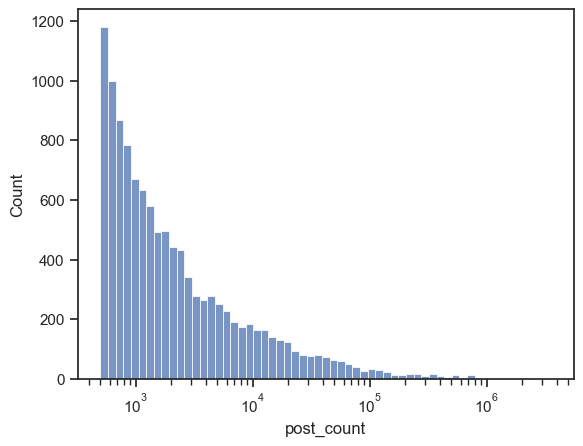

In [82]:
sns.histplot(data=df.post_count, log_scale=(True,False))

As always, most of the tags are at the bottom in an exponential distribution even with the log scaling on the X-axis

In [84]:
df.tail(20)

,updated_at,is_locked,name,category,created_at,post_count,id
952772,2019-09-01 18:49:53.240000+00:00,False,ms._fortune_(skullgirls),characters,2013-02-28 20:24:51.451000+00:00,501,641993
952773,2019-09-02 14:15:51.636000+00:00,False,kasugano_urara_(yes!_precure_5),characters,2014-09-20 21:10:29.823000+00:00,501,1290689
952771,2019-09-02 15:03:28.493000+00:00,False,shirley_fenette,characters,2013-02-28 09:20:08.725000+00:00,501,375867
720252,2020-09-03 22:06:37.849000+00:00,False,icomochi,artist,2020-09-01 17:39:31.442000+00:00,501,1591892
720251,2019-09-01 21:57:00.223000+00:00,False,matanonki,artist,2017-08-16 03:22:45.165000+00:00,501,1433077
759396,2019-09-01 18:45:24.106000+00:00,False,xenosaga_episode_iii,copyright,2013-02-28 13:26:47.269000+00:00,501,429243
720250,2019-09-01 18:31:31.487000+00:00,False,rebe11,artist,2014-10-12 17:05:57.235000+00:00,501,1292901
720249,2019-09-01 19:16:48.886000+00:00,False,kuroi_mimei,artist,2013-02-27 18:55:47.738000+00:00,501,500839
952778,2021-10-26 03:09:21.206000+00:00,False,kashino_(hot_springs_relaxation)_(azur_lane),characters,2021-10-26 03:09:21.186000+00:00,501,1708104
423126,2019-08-29 06:43:41.847000+00:00,False,hakuo_school_uniform,general,2017-04-09 15:39:51.766000+00:00,500,1415205


Just a lot of random stuff. I have no clue what most of these even refer to.

In [87]:
df.head(500)['category'].value_counts()

category
general       478
copyright      18
characters      4
Name: count, dtype: int64

In [88]:
df.tail(500)['category'].value_counts()

category
general       188
artist        138
characters    138
copyright      36
Name: count, dtype: int64

It seems that the more popular the tag is, the more likely it is to be a 'general' tag that describes a visual aspect of the image rather than the character, which IP the character came from or the artist. Makes sense as they are more applicable to more images, and it's not really possible for an artist to be pumping out hundreds of thousands of illustrations.

In [100]:
# Now that's a lotta 2hu
print('2hu post count: ', df[df['name'] == 'touhou'].post_count.item())

2hu post count:  711457


### Conclusions

## Yes

In [3]:
df = pd.read_json('dataset/full_train_dataset.json',orient='records')
df.head()

,tag_string_general,has_visible_children,has_large,tag_count_meta,bit_flags,has_active_children,preview_file_url,image_width,updated_at,tag_string_artist,...,file_ext,last_commented_at,last_comment_bumped_at,parent_id,approver_id,pixiv_id,last_noted_at,prompt_string,prompt_format_id,caption_string
0,1girl areola_slip areolae arm_under_breasts ba...,False,0.0,1,2,False,https://cdn.donmai.us/preview/cd/99/cd9918b473...,778,2021-12-11 19:37:27.451000+00:00,inoue_takuya_(tactactak),...,jpg,NaT,NaT,NaN,131474.0,75772220.0,NaT,Reply with an eloquent caption based on all th...,0,"""Through the skilled hands of artist inoue_tak..."
1,2girls blue_eyes blue_hair hat multiple_girls ...,False,0.0,1,0,False,https://cdn.donmai.us/preview/0d/c1/0dc1e76d97...,600,2021-07-15 18:21:13.327000+00:00,yuzuki_(yuduame),...,jpg,NaT,NaT,NaN,NaN,2658681.0,NaT,Reply with a concise description of an artwork...,1,"The artwork features two girls, Cirno and Lett..."
2,2girls blurry bug butterfly cherry_blossoms de...,False,0.0,2,0,False,https://cdn.donmai.us/preview/07/bd/07bdb85252...,700,2021-08-30 09:34:50.982000+00:00,tokoroten_(hmmuk),...,jpg,NaT,NaT,NaN,318380.0,39438207.0,NaT,Reply with a concise description of an artwork...,1,"The artwork features two girls, Konpaku Youmu ..."
3,1girl animal_ears bell brown_eyes brown_hair f...,False,1.0,2,0,False,https://cdn.donmai.us/preview/8b/da/8bda6612f4...,1000,2021-07-01 20:44:18.278000+00:00,neme,...,jpg,NaT,NaT,NaN,13392.0,37532574.0,NaT,Reply with a highly condensed run on sentence ...,2,Neme's artist rendition of Touhou's Futatsuiwa...
4,1girl bangs black_headwear blue_eyes blue_hair...,False,1.0,1,2,False,https://cdn.donmai.us/preview/72/bf/72bfaeb56a...,1448,2021-11-17 01:45:03.298000+00:00,osechi_(pixiv56606477),...,jpg,NaT,NaT,NaN,NaN,92667932.0,NaT,Reply with a concise description of an artwork...,1,The artwork is a portrait of Hoshimachi Suisei...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19950 entries, 0 to 19949
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   tag_string_general      19950 non-null  object             
 1   has_visible_children    19950 non-null  bool               
 2   has_large               19892 non-null  float64            
 3   tag_count_meta          19950 non-null  int64              
 4   bit_flags               19950 non-null  int64              
 5   has_active_children     19950 non-null  bool               
 6   preview_file_url        19636 non-null  object             
 7   image_width             19950 non-null  int64              
 8   updated_at              19950 non-null  datetime64[ns, UTC]
 9   tag_string_artist       19950 non-null  object             
 10  tag_count               19950 non-null  int64              
 11  is_status_locked        19950 non-null  b

[Text(0.5, 1.0, 'Caption word count (whitespace)')]

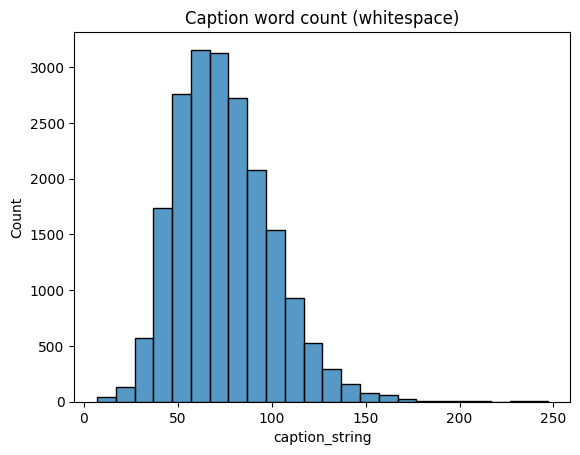

In [6]:
sns.histplot(data=df.caption_string.str.split().apply(len), binwidth=10).set(title='Caption word count (whitespace)')

In [37]:
from collections import defaultdict
import pandas as pd


def count_tags(df):
    tag_counts = defaultdict(lambda: {'post_count': 0, 'category': ''})
    category_map = {'tag_string_general': 'general', 
                    'tag_string_copyright': 'copyright', 
                    'tag_string_character': 'character', 
                    'tag_string_meta': 'meta', 
                    'tag_string_artist': 'artist'}
    for _, row in df.iterrows():
        for col in category_map:
            tags = row[col].split()
            for tag in tags:
                tag_counts[tag]['post_count'] += 1
                tag_counts[tag]['category'] = category_map[col]
    return tag_counts


def create_df(tag_counts):
    tag_df = pd.DataFrame.from_dict(tag_counts, orient='index')
    tag_df.index.name = 'name'
    tag_df = tag_df.sort_values('post_count', ascending=False)
    tag_df = tag_df.reset_index()
    return tag_df

In [38]:
tag_counts = count_tags(df)
tag_df = create_df(tag_counts)
tag_df

,name,post_count,category
0,1girl,14090,general
1,commentary_request,11825,meta
2,solo,11646,general
3,long_hair,10299,general
4,highres,10249,meta
...,...,...,...
39783,meipu_hm,1,artist
39784,mia_(fire_emblem),1,character
39785,mitani_yuuki,1,character
39786,teramoto_tomiko,1,character


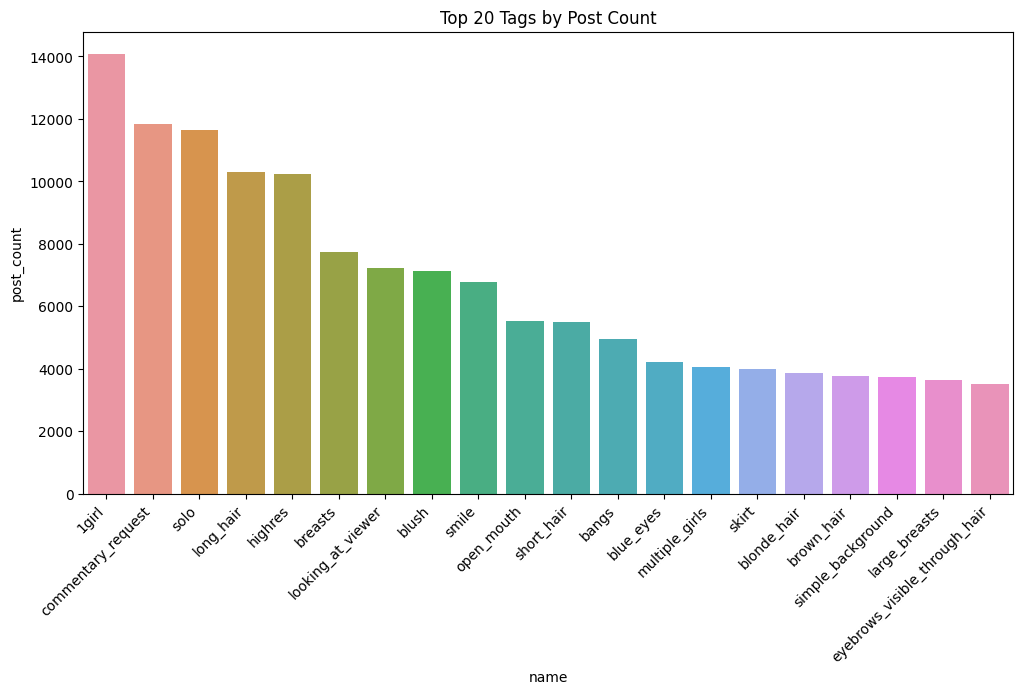

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(x='name', y='post_count', data=tag_df.head(20)).set(title='Top 20 Tags by Post Count')
plt.xticks(rotation=45, ha='right')
plt.show()

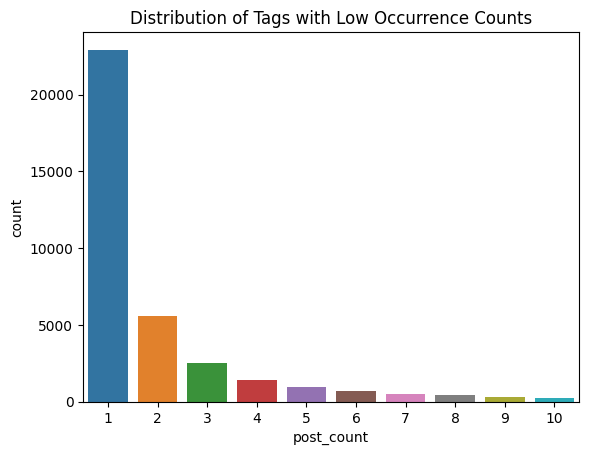

In [46]:
sns.countplot(data=tag_df[tag_df['post_count'] <= 10], x='post_count')\
   .set(title='Distribution of Tags with Low Occurrence Counts')
plt.show()

In [71]:
tag_df[tag_df["post_count"]==1].sample(10)[['name','category']]

,name,category
22505,momoko_(momoko14),artist
18789,akasaka_(qv92612),artist
19762,microsoft,copyright
19332,decidueye,character
32585,16400526,artist
31179,military_rank_insignia,general
33944,hyottoko_(rurouni_kenshin),character
24546,moni158,artist
17844,mogskg,artist
39141,hishou_kotatsu,artist


In [125]:
tag_df[tag_df["post_count"]==1]['category'].value_counts()

artist       10356
character     6689
general       4337
copyright     1507
meta            38
Name: category, dtype: int64

Now that's a lotta low occurence tags. They're mostly very niche things. Let's prune it down to the tags that actually prevalent on danbooru, and are therefore, more impactful in image generation.
Also, let's exclude the metadata tags, since they don't contribute to the image generation and aren't included in the captions in the first place.

Example meta tags: commentary_request, translated, bad_pixiv_id, jpeg_artifacts

Who cares? They muddle up the caption with unrealistic details as well.

## Bruh

In [60]:
reduced_tag_df = full_tag_df[
    (full_tag_df["post_count"] >= 500) & (full_tag_df["category"] != "meta")
].sort_values("post_count", ascending=False)
reduced_tag_df

,updated_at,is_locked,name,category,created_at,post_count,id
423668,2019-12-27 00:19:43.276000+00:00,False,1girl,general,2013-02-28 03:39:31.882000+00:00,3569919,470575
404627,2019-12-27 00:20:15.092000+00:00,False,solo,general,2013-02-28 16:42:53.574000+00:00,2946330,212816
418361,2019-08-27 00:40:54.525000+00:00,False,long_hair,general,2013-02-28 05:04:36.440000+00:00,2506393,13197
423348,2019-08-27 20:54:38.246000+00:00,False,breasts,general,2013-02-28 04:44:05.108000+00:00,1894136,8601
421755,2019-12-27 00:19:45.849000+00:00,False,blush,general,2013-02-28 16:34:19.520000+00:00,1715415,3389
...,...,...,...,...,...,...,...
952744,2019-09-02 08:13:50.845000+00:00,False,sazaki_kaoruko,characters,2014-10-02 19:28:43.325000+00:00,500,1291870
759383,2019-09-01 20:39:30.597000+00:00,False,gundam_g_no_reconguista,copyright,2014-10-11 22:48:20.184000+00:00,500,1292817
759382,2019-09-02 08:53:18.934000+00:00,False,sakura_trick,copyright,2013-02-28 01:13:26.956000+00:00,500,723747
720228,2019-09-02 13:00:11.107000+00:00,False,mossi,artist,2014-03-12 20:38:27.433000+00:00,500,1267737


In [81]:
tag_list = reduced_tag_df['name'].reset_index(drop=True)

# Filter the DataFrame to include only rows where the 'name' column is in the list of wanted tags
tag_df_filtered = tag_df[tag_df["name"].isin(tag_list)]

# Convert the 'name' column to a Categorical data type with the categories in 'all_tags'
tag_df_filtered = tag_df_filtered.assign(name=pd.Categorical(tag_df_filtered['name'], categories=tag_list))

# Sort the filtered DataFrame by the 'name' column and reset the index
tag_df_filtered = tag_df_filtered.sort_values("name").reset_index(drop=True)
tag_df_filtered

,name,post_count,category
0,1girl,14090,general
1,solo,11646,general
2,long_hair,10299,general
3,breasts,7752,general
4,blush,7129,general
...,...,...,...
11081,falken_(yutozin),1,artist
11082,sazaki_kaoruko,2,character
11083,gundam_g_no_reconguista,2,copyright
11084,mossi,3,artist


In [7]:
sns.histplot(data=tag_df_filtered,x='post_count',log_scale=True)

NameError: name 'tag_df_filtered' is not defined

Yeah, it's still terribly imbalanced. I know. Some of the tags in the tag_list don't even appear in the train data. That's how it's always going to be with danbooru. 1girl or long_hair will always be more popular than some obscure artist's name

## Let's now analyze the processed dataset

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns

In [10]:
df = pd.read_json('dataset/train_data.json',orient='records')
tag_list = open(r'dictionaries/tag_dict.txt').read().splitlines()
df

,caption_string,tag_string
0,"""Through the skilled hands of artist inoue_tak...","1girl, areola_slip, areolae, arm_under_breasts..."
1,"The artwork features two girls, Cirno and Lett...","2girls, blue_eyes, blue_hair, cirno, hat, lett..."
2,"The artwork features two girls, Konpaku Youmu ...","2girls, blurry, bug, butterfly, cherry_blossom..."
3,Neme's artist rendition of Touhou's Futatsuiwa...,"1girl, animal_ears, bell, brown_eyes, brown_ha..."
4,The artwork is a portrait of Hoshimachi Suisei...,"1girl, bangs, black_headwear, blue_eyes, blue_..."
...,...,...
19945,The artwork by 05tom16 features six girls from...,"6+girls, ahoge, aqua_hair, bandages, black_hai..."
19946,The artwork features the character Shiragiku H...,"1girl, arms_up, backlighting, bangs, black_hai..."
19947,"With her sultry gaze and captivating curves, S...","1girl, breasts, cleavage, greyscale, headphone..."
19948,Masayo (Gin no Ame) depicts Kuma (Kantai Colle...,"1girl, :d, ahoge, alternate_costume, animal_ea..."


In [4]:
df['tags'] = df['tag_string'].str.split(', ')

In [5]:
from sklearn import preprocessing
mlb = preprocessing.MultiLabelBinarizer(classes=tag_list)
mlb.fit([list(tag_list)])
one_hots = pd.DataFrame(mlb.transform(df['tags']),columns=mlb.classes_, index=df.index)
one_hots

,1girl,solo,long_hair,breasts,blush,looking_at_viewer,smile,short_hair,open_mouth,bangs,...,chrysanthemum,pitcher,sunhyun,holding_ladle,falken_(yutozin),sazaki_kaoruko,gundam_g_no_reconguista,sakura_trick,mossi,nanashino
0,1,1,0,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19945,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
19946,1,1,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
19947,1,1,1,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
19948,1,1,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
corr_coef = np.corrcoef(one_hots.T)

c:\Users\panta\anaconda3\lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\panta\anaconda3\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [13]:
corr_coef

array([[ 1.00000000e+00,  5.81995002e-01,  7.31501493e-02, ...,
                    nan, -1.06621459e-03,  4.56596677e-03],
       [ 5.81995002e-01,  1.00000000e+00,  3.11047388e-02, ...,
                    nan,  2.06264874e-03,  5.97853412e-03],
       [ 7.31501493e-02,  3.11047388e-02,  1.00000000e+00, ...,
                    nan, -4.48861142e-03,  6.85374692e-03],
       ...,
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [-1.06621459e-03,  2.06264874e-03, -4.48861142e-03, ...,
                    nan,  1.00000000e+00, -8.68282941e-05],
       [ 4.56596677e-03,  5.97853412e-03,  6.85374692e-03, ...,
                    nan, -8.68282941e-05,  1.00000000e+00]])

<AxesSubplot: ylabel='Density'>

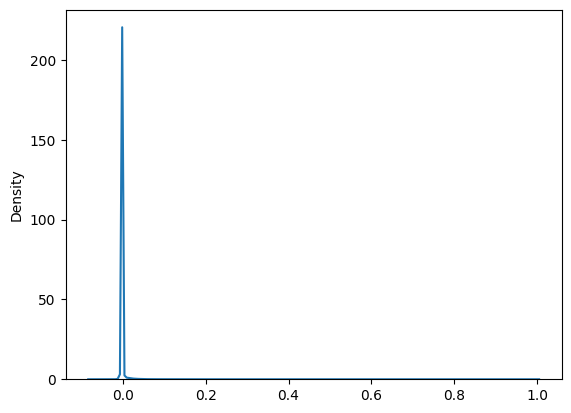

In [20]:
sns.kdeplot(data=np.random.choice(np.nan_to_num(corr_coef.flatten()), size=100000))

In [34]:
def find_correlations_within_range(
    corr_coef, correlation_range, one_hots, print_corrs=True
):
    corr_coef = np.nan_to_num(corr_coef)
    row_idx, col_idx = np.triu_indices_from(corr_coef, k=1)
    corr_values = corr_coef[row_idx, col_idx]
    within_range = np.logical_and(
        corr_values >= correlation_range[1], corr_values < correlation_range[0]
    )
    corrs = [
        (one_hots.columns[i], one_hots.columns[j], corr_coef[i, j])
        for i, j in zip(row_idx[within_range], col_idx[within_range])
    ]
    top_corrs = sorted(corrs, key=lambda x: x[2], reverse=True)

    if print_corrs:
        for i, (col1, col2, corr) in enumerate(top_corrs):
            print(f"{i+1}. {col1} - {col2}: {corr:.3f}")
    else:
        return top_corrs

In [37]:
find_correlations_within_range(corr_coef, (0.99, 0.9), one_hots)

1. nier_(series) - nier_automata: 0.987
2. layered_sleeves - short_over_long_sleeves: 0.982
3. oda_nobunaga_(fate) - oda_nobunaga_(koha/ace): 0.972
4. hakama - hakama_skirt: 0.970
5. no_headwear - no_hat: 0.969
6. gradient - gradient_background: 0.968
7. pervert - female_pervert: 0.967
8. stuffed_toy - stuffed_animal: 0.962
9. kirby_(series) - kirby: 0.957
10. watashi_ga_motenai_no_wa_dou_kangaetemo_omaera_ga_warui! - kuroki_tomoko: 0.957
11. print_bow - print_bowtie: 0.957
12. silk - spider_web: 0.953
13. mechanical_horns - frankenstein's_monster_(fate): 0.953
14. joseph_joestar - joseph_joestar_(young): 0.953
15. egg_(food) - fried_egg: 0.949
16. odin_sphere - gwendolyn_(odin_sphere): 0.949
17. medusa_(fate) - medusa_(rider)_(fate): 0.949
18. cardcaptor_sakura - kinomoto_sakura: 0.949
19. sandwiched - girl_sandwich: 0.949
20. jaguar_ears - jaguar_(kemono_friends): 0.943
21. tomoe_(symbol) - mitsudomoe_(shape): 0.943
22. oshiro_project - oshiro_project_re: 0.943
23. phantasy_star - ph

## We analyzing the pred data less go

In [6]:
from datasets import load_dataset
from sklearn.metrics import *
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

tag_list = open(r'dictionaries/tag_dict.txt').read().splitlines()
mlb = MultiLabelBinarizer(classes=tag_list)
mlb.fit([list(tag_list)])

data = load_dataset("json", data_files=r"preds/llama_preds.json")
preds = mlb.transform(data['train']['pred_tags'])
true = mlb.transform(data['train']['tags'])

Found cached dataset json (C:/Users/panta/.cache/huggingface/datasets/json/default-b0f58694b2a7d8fd/0.0.0/0f7e3662623656454fcd2b650f34e886a7db4b9104504885bd462096cc7a9f51)


  0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
print("Precision score (samples): {:.3f}".format(precision_score(true, preds, average='samples')))
print("Recall score (samples): {:.3f}".format(recall_score(true, preds, average='samples')))
print("F1 score (weighted): {:.3f}".format(f1_score(true, preds, average='weighted', zero_division=1)))
print("F1 score (samples): {:.3f}".format(f1_score(true, preds, average='samples', zero_division=1)))
print("F1 score (micro): {:.3f}".format(f1_score(true, preds, average='micro', zero_division=1)))
print("F1 score (macro): {:.3f}".format(f1_score(true, preds, average='macro', zero_division=1)))

Precision score (samples): 0.638
Recall score (samples): 0.561
F1 score (weighted): 0.562
F1 score (samples): 0.585
F1 score (micro): 0.571
F1 score (macro): 0.913


In [4]:
preds.shape

(150, 11389)

In [11]:
precision, recall, f1, support = precision_recall_fscore_support(true, preds)

# create a DataFrame to visualize the precision, recall, and F1 scores
df = pd.DataFrame({'Precision': precision, 'Recall': recall, 'F1': f1, 'Support': support}, index=tag_list)

c:\Users\panta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\panta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
sorted_df = df.sort_values(by='F1', ascending=False)
sorted_df[(sorted_df['Support'] > 5)].head(10)

,Precision,Recall,F1,Support
fate_(series),1.000000,0.909091,0.952381,11
danganronpa_(series),0.923077,0.923077,0.923077,13
flower,1.000000,0.857143,0.923077,14
scarf,0.857143,1.000000,0.923077,6
gloves,0.888889,0.941176,0.914286,17
clenched_hand,1.000000,0.833333,0.909091,6
hood,0.866667,0.928571,0.896552,14
fate/grand_order,1.000000,0.800000,0.888889,10
animal_ears,0.833333,0.909091,0.869565,11
blue_eyes,0.884615,0.851852,0.867925,27


In [21]:
sorted_df[(sorted_df['Support'] > 5)].tail(10)

,Precision,Recall,F1,Support
skirt,0.444444,0.250000,0.320000,16
necklace,0.333333,0.285714,0.307692,7
breasts,0.178571,0.714286,0.285714,7
grey_background,0.400000,0.222222,0.285714,9
hair_between_eyes,0.307692,0.235294,0.266667,17
looking_away,1.000000,0.142857,0.250000,7
full_body,0.333333,0.111111,0.166667,9
short_sleeves,0.500000,0.071429,0.125000,14
artist_name,0.000000,0.000000,0.000000,6
holding_sword,0.000000,0.000000,0.000000,6
